In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE
from large_gcs.cost_estimators.factored_collision_free_ce import FactoredCollisionFreeCE


import numpy as np
from copy import deepcopy
from IPython.display import HTML



np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
# logging.getLogger().setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)

In [2]:
cg = ContactGraph.load_from_file(ContactGraphGeneratorParams.graph_file_path_from_name("cg_maze_a2"))

INFO:large_gcs.graph.contact_graph:Loading 35 contact pair modes for 4 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 836 sets...
100%|██████████| 836/836 [00:01<00:00, 501.36it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 838/838 [00:00<00:00, 15935.99it/s]
INFO:large_gcs.graph.graph:Adding 838 vertices to graph...
100%|██████████| 838/838 [00:00<00:00, 10851.51it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 53586/53586 [00:05<00:00, 9570.88it/s] 
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 53586/53586 [00:09<00:00, 5789.84it/s]
INFO:large_gcs.graph.graph:Adding 53586 edges to graph...
100%|██████████| 53586/53586 [00:10<00:00, 5286.39it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 18), n_vertices=838, n_edges=53586, source=[array([1.600, 0.600]), array([3.250, 0.000])], target=[array([-2.300, -0.700]), array([-0.

In [3]:
cost_estimator = FactoredCollisionFreeCE(cg)

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 8/8 [00:00<00:00, 10820.52it/s]
INFO:large_gcs.graph.graph:Adding 8 vertices to graph...
100%|██████████| 8/8 [00:00<00:00, 13836.88it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
100%|██████████| 28/28 [00:00<00:00, 717.81it/s]
INFO:large_gcs.graph.contact_graph:56 edges generated
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 56/56 [00:00<00:00, 19477.65it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 56/56 [00:00<00:00, 9192.64it/s]
INFO:large_gcs.graph.graph:Adding 56 edges to graph...
100%|██████████| 56/56 [00:00<00:00, 8866.11it/s]
INFO:large_gcs.graph.factored_collision_free_graph:Created factored collision free graph for obj0: GraphParams(dim_bounds=(2, 4), n_vertices=8, n_edges=56, source=None, target=[array([-2.300, -0.700])], workspace=array([[-5,  5],
       [-5,  5]]), default_costs_constraints=None)
INFO:lar

["('NC|obs0_f0-obj0_v3', 'NC|obs1_f0-obj0_v3')",
 "('NC|obs0_f0-obj0_v3', 'NC|obs1_f1-obj0_v0')",
 "('NC|obs0_f0-obj0_v3', 'NC|obs1_f2-obj0_v1')",
 "('NC|obs0_f1-obj0_v1', 'NC|obs1_f1-obj0_v0')",
 "('NC|obs0_f1-obj0_v1', 'NC|obs1_f2-obj0_v1')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs1_f0-obj0_v3')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs1_f2-obj0_v1')",
 'target']

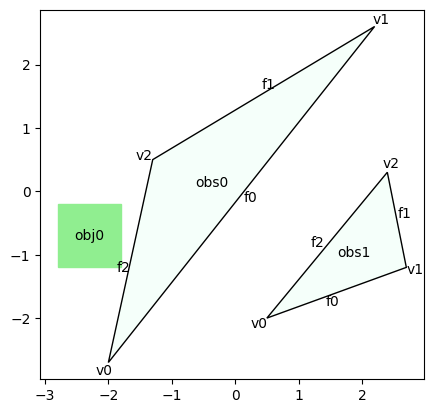

In [4]:
fcfg = cost_estimator._collision_free_graphs[0]
fcfg.plot()
fcfg.vertex_names
# 

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpz27k41tk/temp.m4v


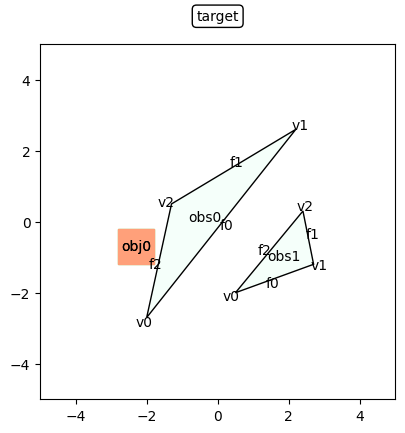

In [14]:
fcfg.set_source(fcfg.vertex_names[3])
sol = fcfg.solve()
anim = fcfg.animate_solution()
HTML(anim.to_html5_video())

In [ ]:
# cost_estimator = ShortcutEdgeCE(cg, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted)
# gcs_astar = GcsAstarConvexRestriction(
#     cg,
#     cost_estimator=cost_estimator,
#     should_reexplore=True,
# )
# sol = gcs_astar.run()